In [1]:
# import required packages

# analysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px

In [2]:
# read original dataframe
df = pd.read_csv('storms.csv')

# drop extraneous index column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
# check dataframe
df.head()

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN


In [4]:
# get new date column from year month day hour
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [5]:
# check new date column
df['date'].head()

0   1975-06-27 00:00:00
1   1975-06-27 06:00:00
2   1975-06-27 12:00:00
3   1975-06-27 18:00:00
4   1975-06-28 00:00:00
Name: date, dtype: datetime64[ns]

In [6]:
# group hurricanes by name and year, we're going to try to find the total number of hurricanes per year
# our original dataframe has multiple records per storm, since it tracks the storm from start to end,
# so we have to group the records by name to not double count 
sums = df.groupby(['name', 'year']).size().reset_index(name='counter')

In [7]:
# this is the # of hurricanes per year
counts = pd.DataFrame(sums['year'].value_counts()).reset_index()

In [8]:
counts.head()

,year,count
0,2020,30
1,2005,29
2,2010,21
3,1995,21
4,2003,21


In [9]:
# graph w/ altair
hurricanes = alt.Chart(counts).mark_bar().encode(
    x=alt.X('year', scale=alt.Scale(domain=[1975,2021])),
    y=alt.Y('count', scale=alt.Scale(domain=[0,35])),
    tooltip=['year', 'count(year):Q']
).properties(
    width=700,
    title='Total Number of Hurricanes per Year'
)

In [10]:
# add linear trendline

# how to add r2 to graph?
trendline = hurricanes.transform_regression('year', 'count').mark_line(color='red')

In [11]:
hurricanes + trendline

alt.LayerChart(...)

In [12]:
grouped = pd.DataFrame(df.groupby(['name', 'year']).size().reset_index())

In [13]:
df.isna().sum()

name                                0
year                                0
month                               0
day                                 0
hour                                0
lat                                 0
long                                0
status                              0
category                        14382
wind                                0
pressure                            0
tropicalstorm_force_diameter     9512
hurricane_force_diameter         9512
date                                0
dtype: int64

In [14]:
# get sea surface anomaly temps for the entire atlantic ocean
temps = pd.read_csv('sea-surface-temp_fig-1.csv')

In [15]:
# check new df
temps.head()

,Year,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
0,1880,-0.420,-0.628152,-0.211848
1,1881,-0.330,-0.531096,-0.128904
2,1882,-0.348,-0.545568,-0.150432
3,1883,-0.456,-0.650040,-0.261960
4,1884,-0.582,-0.790152,-0.373848


In [16]:
# limit temps to the years of our original dataframe
temps = temps[(temps['Year'] >= 1975) & (temps['Year'] < 2022)].copy().reset_index()

In [17]:
temps.drop('index', axis=1, inplace=True)

In [18]:
temps.head()

,Year,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
0,1975,-0.438,-0.522672,-0.353328
1,1976,-0.366,-0.447144,-0.284856
2,1977,-0.078,-0.166200,0.010200
3,1978,-0.186,-0.270672,-0.101328
4,1979,0.048,-0.036672,0.132672


In [19]:
counts['year'].describe()

count      47.000000
mean     1998.000000
std        13.711309
min      1975.000000
25%      1986.500000
50%      1998.000000
75%      2009.500000
max      2021.000000
Name: year, dtype: float64

In [20]:
temps['Year'].describe()

count      46.000000
mean     1997.500000
std        13.422618
min      1975.000000
25%      1986.250000
50%      1997.500000
75%      2008.750000
max      2020.000000
Name: Year, dtype: float64

In [21]:
# add a new row b/c there's no data for 2021 but our original dataframe goes to 2021
import numpy as np
new_row = {'Year':2021, 'Annual anomaly': np.nan, 'Lower 95% confidence interval':np.nan, 'Upper 95% confidence interval':np.nan}

In [22]:
# add it to the end of the dataframe
temps.loc[len(temps)] = new_row

In [23]:
# rename columns for merging
temps.rename(columns={'Year':'year'}, inplace=True)

In [24]:
# merge into one dataframe on year column
combo = pd.merge(counts, temps, on='year')

In [25]:
# check for successful merge
combo.head()

,year,count,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
0,2020,30,0.840,0.797664,0.882336
1,2005,29,0.426,0.390720,0.461280
2,2010,21,0.516,0.480720,0.551280
3,1995,21,0.174,0.131664,0.216336
4,2003,21,0.462,0.412608,0.511392


In [26]:
# add el nino/la nina data
nino = pd.read_csv('elninolanina.csv')

In [27]:
# check
nino.head()

,YR,MON,TOTAL,ClimAdj,ust ANOM,Unnamed: 5
0,1950,1,24.56,26.18,-1.62,-0.858333
1,1950,2,25.07,26.39,-1.32,NaN
2,1950,3,25.88,26.95,-1.07,NaN
3,1950,4,26.29,27.39,-1.11,NaN
4,1950,5,26.19,27.56,-1.37,NaN


In [28]:
# drop vestigial row and non anomaly rows
nino.drop(['Unnamed: 5', 'TOTAL', 'ClimAdj'], axis=1, inplace=True)

In [29]:
# rename for eventual merge
nino.rename(columns={'YR':'year', 'ust ANOM':'anomaly', 'MON':'month'}, inplace=True)

In [30]:
nino.head()

,year,month,anomaly
0,1950,1,-1.62
1,1950,2,-1.32
2,1950,3,-1.07
3,1950,4,-1.11
4,1950,5,-1.37


In [31]:
# get only months of hurricane season and years from our original dataset
months = [6, 7, 8, 9, 10, 11]
years = list(range(1975, 2022))
nino = nino[(nino['month'].isin(months)) & (nino['year'].isin(years))]

In [32]:
# get an average of those months and set it as the value for a given year
grp_nino = nino.groupby('year')['anomaly'].mean().reset_index(name='avg_anomaly')

In [33]:
grp_nino.head()

,year,avg_anomaly
0,1975,-1.280000
1,1976,0.496667
2,1977,0.540000
3,1978,-0.325000
4,1979,0.245000


In [34]:
combo = pd.merge(combo, grp_nino, on='year')

In [35]:
combo[combo['year'] == 1975]

,year,count,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval,avg_anomaly
39,1975,8,-0.438,-0.522672,-0.353328,-1.28


In [36]:
combo.sort_values(by='year', inplace=True)

In [37]:
combo.head()

,year,count,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval,avg_anomaly
39,1975,8,-0.438,-0.522672,-0.353328,-1.280000
42,1976,7,-0.366,-0.447144,-0.284856,0.496667
43,1977,6,-0.078,-0.166200,0.010200,0.540000
29,1978,11,-0.186,-0.270672,-0.101328,-0.325000
38,1979,8,0.048,-0.036672,0.132672,0.245000


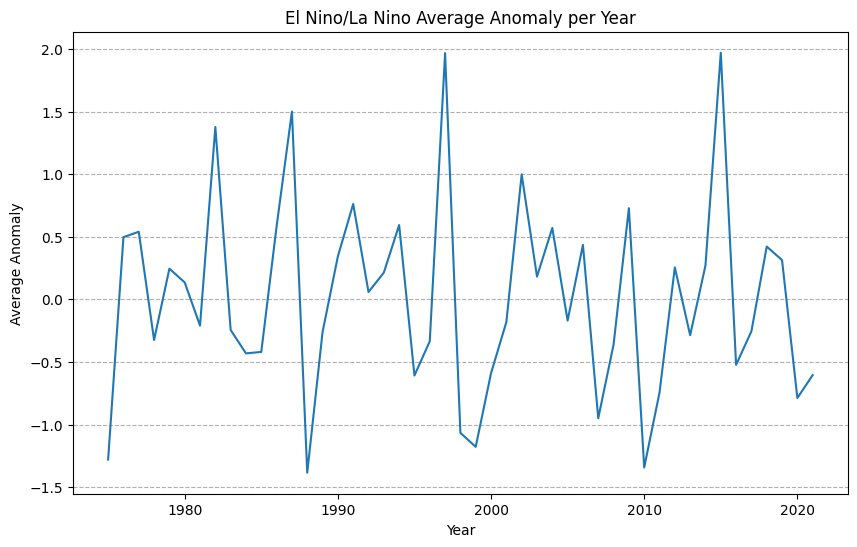

In [38]:
plt.figure(figsize=(10,6))
plt.plot(combo['year'], combo['avg_anomaly'])
plt.title('El Nino/La Nino Average Anomaly per Year')
plt.xlabel('Year')
plt.ylabel('Average Anomaly')
plt.grid(axis='y', linestyle='--')

# could figure out how to add shaded blocks of background to denote strong, medium, weak events

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average Anomaly'),
 Text(0.5, 1.0, 'El Nino/La Nina Average Anomaly per Year')]

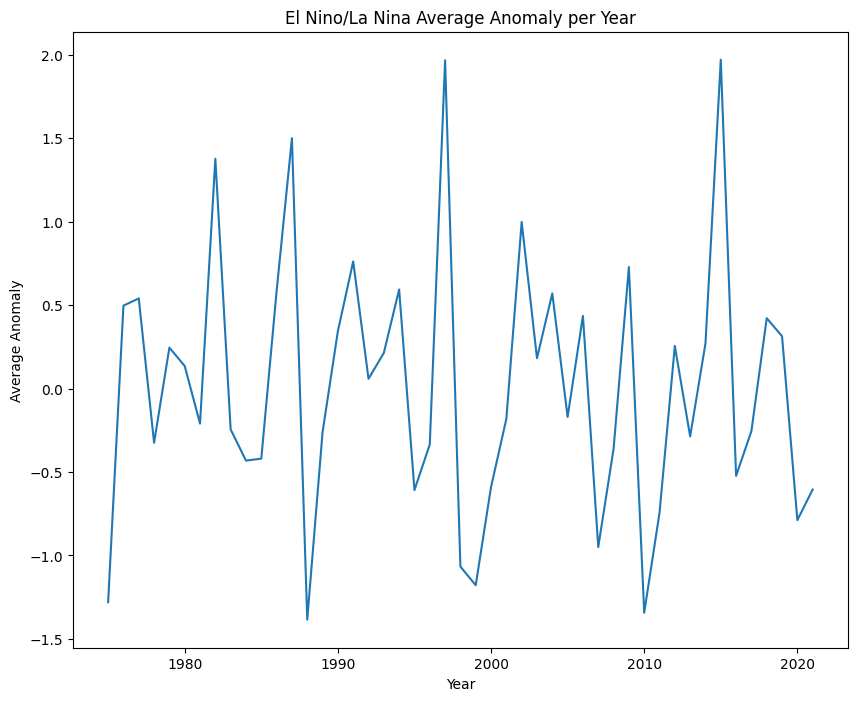

In [44]:
import seaborn as sns
nino_fig = plt.figure(figsize=(10,8))
nino_fig = sns.lineplot(data=combo, x='year', y='avg_anomaly')
nino_fig.set(xlabel='Year', ylabel='Average Anomaly', title='El Nino/La Nina Average Anomaly per Year')

In [ ]:
combo.rename(columns={'AtlanticAnomaly': 'atlantic_anomaly', 'avg_anomaly':'nino_anomaly'}, inplace=True)

In [ ]:
combo.head()

,year,count,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval,nino_anomaly
39,1975,8,-0.438,-0.522672,-0.353328,-1.280000
42,1976,7,-0.366,-0.447144,-0.284856,0.496667
43,1977,6,-0.078,-0.166200,0.010200,0.540000
29,1978,11,-0.186,-0.270672,-0.101328,-0.325000
38,1979,8,0.048,-0.036672,0.132672,0.245000


In [ ]:
combo.drop(['Lower 95% confidence interval', 'Upper 95% confidence interval'], axis=1, inplace=True)

In [ ]:
combo.head()

,year,count,Annual anomaly,nino_anomaly
39,1975,8,-0.438,-1.280000
42,1976,7,-0.366,0.496667
43,1977,6,-0.078,0.540000
29,1978,11,-0.186,-0.325000
38,1979,8,0.048,0.245000


In [ ]:
# Read in southern oscillation data
soi = pd.read_csv('soi.csv', header=1)

In [ ]:
# check data
soi.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Unnamed: 13,Unnamed: 14
0,1951,2.5,1.5,-0.2,-0.5,-1.1,0.3,-1.7,-0.4,-1.8,-1.6,-1.3,-1.2,NaN,NaN
1,1952,-1.5,-1.0,0.9,-0.4,1.2,1.2,0.8,0.1,-0.4,0.6,0.0,-2.0,NaN,NaN
2,1953,0.5,-0.8,-0.3,0.3,-2.8,0.2,-0.0,-2.0,-2.1,0.1,-0.5,-0.8,NaN,NaN
3,1954,1.1,-0.5,0.4,1.1,0.8,0.2,0.7,1.8,0.3,0.4,0.2,2.3,NaN,NaN
4,1955,-0.9,3.1,1.1,-0.2,1.7,2.2,2.6,2.4,2.2,2.5,2.0,1.6,NaN,NaN


In [ ]:
# drop unecessary columns (Unnamed 13 and 14) and rename year column
soi.drop(['Unnamed: 13', 'Unnamed: 14'], axis=1, inplace=True)

In [ ]:
soi.rename(columns={'YEAR':'year'}, inplace=True)

In [ ]:
# get years from original dataset (1975-2021)
soi = soi[(soi['year'] >= 1975) & (soi['year'] < 2022)]

In [ ]:
soi.describe()

,year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1998.000000,0.185106,0.104255,0.272340,0.087234,0.165957,0.076596,0.182979,0.061702,0.010638,0.042553,0.070213,0.163830
std,13.711309,2.071229,2.349186,1.794642,1.365669,1.072842,1.085320,1.351540,1.407674,1.593224,1.497642,1.436014,1.863193
min,1975.000000,-5.800000,-6.000000,-4.000000,-2.400000,-2.200000,-2.300000,-2.500000,-2.900000,-2.900000,-2.800000,-4.300000,-3.700000
25%,1986.500000,-0.700000,-1.150000,-0.750000,-1.000000,-0.600000,-0.700000,-0.800000,-0.700000,-1.200000,-0.600000,-0.800000,-0.950000
50%,1998.000000,0.300000,0.400000,0.300000,0.100000,0.400000,0.100000,0.300000,0.200000,0.200000,0.000000,-0.100000,-0.200000
75%,2009.500000,1.700000,1.900000,1.500000,0.950000,0.800000,0.800000,1.000000,0.950000,1.000000,1.200000,1.200000,1.600000
max,2021.000000,3.800000,4.500000,4.200000,3.100000,2.200000,2.100000,3.100000,3.300000,3.700000,2.900000,3.000000,4.800000


In [ ]:
# drop months that aren't in hurricane season
soi.drop(soi.columns[[1,2,3,4,5,12]], axis=1, inplace=True)

In [ ]:
soi.head()

,year,JUN,JUL,AUG,SEP,OCT,NOV
24,1975,2.1,3.1,3.3,3.4,2.8,1.9
25,1976,0.4,-1.4,-1.3,-1.9,0.7,1.2
26,1977,-1.5,-1.9,-1.3,-1.3,-1.7,-2.1
27,1978,1.1,0.9,0.7,0.1,-0.6,-0.0
28,1979,1.1,2.2,-0.3,0.2,-0.2,-0.7


In [ ]:
# get average soi and add it to new column
soi['soi_average'] = soi.iloc[:, 1:].mean(axis=1)

In [ ]:
soi.head()

,year,JUN,JUL,AUG,SEP,OCT,NOV,soi_average
24,1975,2.1,3.1,3.3,3.4,2.8,1.9,2.766667
25,1976,0.4,-1.4,-1.3,-1.9,0.7,1.2,-0.383333
26,1977,-1.5,-1.9,-1.3,-1.3,-1.7,-2.1,-1.633333
27,1978,1.1,0.9,0.7,0.1,-0.6,-0.0,0.366667
28,1979,1.1,2.2,-0.3,0.2,-0.2,-0.7,0.383333


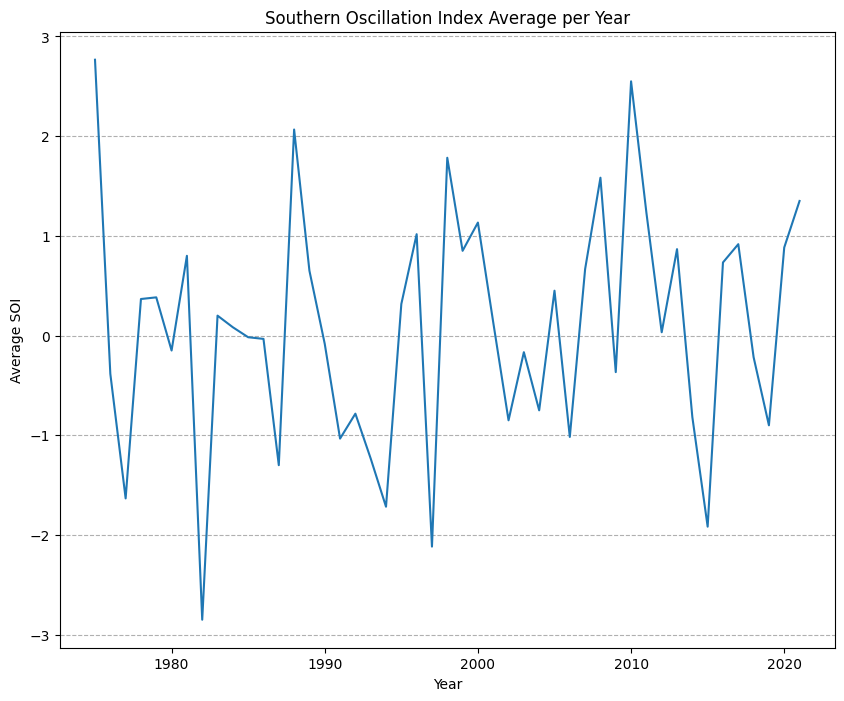

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(soi['year'], soi['soi_average'])
plt.title('Southern Oscillation Index Average per Year')
plt.xlabel('Year')
plt.ylabel('Average SOI')
plt.grid(axis='y', linestyle='--')

In [ ]:
# merge soi and combo dataframes on year
combo = pd.merge(soi[['year', 'soi_average']], combo, on='year', how='inner')

In [ ]:
# check for successful addition
combo.head()

,year,soi_average,count,Annual anomaly,nino_anomaly
0,1975,2.766667,8,-0.438,-1.280000
1,1976,-0.383333,7,-0.366,0.496667
2,1977,-1.633333,6,-0.078,0.540000
3,1978,0.366667,11,-0.186,-0.325000
4,1979,0.383333,8,0.048,0.245000


In [ ]:
# add previous year's count as a feature
combo['prev_count'] = combo['count'].shift(1)

In [ ]:
# check for succesful addition
combo.head()

,year,soi_average,count,Annual anomaly,nino_anomaly,prev_count
0,1975,2.766667,8,-0.438,-1.280000,NaN
1,1976,-0.383333,7,-0.366,0.496667,8.0
2,1977,-1.633333,6,-0.078,0.540000,7.0
3,1978,0.366667,11,-0.186,-0.325000,6.0
4,1979,0.383333,8,0.048,0.245000,11.0


In [ ]:
# read in Outgoing Longwave Radiation data

In [ ]:
olr_data = """YEAR   JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV   DEC    
1974-999.9-999.9-999.9-999.9-999.9  17.3   0.1  16.3  14.6  16.9  15.7   1.9
1975  -2.8  17.1  17.5  11.4  21.4  15.9  18.6  22.2  20.1  21.3  19.7  29.9
1976  16.7  19.0   4.9  10.3   6.1  -5.6  -8.5  -9.7  -5.3  -8.5   3.5 -12.6
1977 -10.4   9.5 -17.6  -0.7   6.2   6.4  -3.3  -0.6  -0.2  -3.5 -11.3 -29.1
1978 -14.5 -14.2-999.9-999.9-999.9-999.9-999.9-999.9-999.9-999.9-999.9-999.9
1979 -11.4  -9.5  -4.3   5.2   0.6   5.2   7.9   3.5  -1.4 -11.2  -7.4  -8.1
1980   9.0   6.9 -17.0   0.3  -2.6 -10.5  -4.6 -13.7   0.6  -4.8  -5.7   5.1
1981   6.0 -10.8 -14.8 -14.0   8.2   5.7   1.7  14.2  -0.3   2.8   4.1  -2.4
1982  14.7   2.0  -8.6  -0.2   7.0  -3.6 -18.9 -25.7 -21.3 -28.0 -31.6 -14.2
1983 -23.5 -10.2   1.0   5.4 -13.0 -14.8 -16.2  -1.6  -1.8   5.3   3.2  16.8
1984  27.1  29.9  18.7  17.3  10.7   7.0   0.9   3.1   3.9   2.9  -3.2   2.0
1985   2.5  19.4 -11.0  12.5  17.6   7.7   5.3   6.8  -0.3   3.0  -2.2   0.8
1986   2.9  14.8  17.8   6.6   5.6  -3.4  -3.1   2.9 -16.2 -11.7 -23.0 -37.5
1987 -36.0 -35.9 -20.5 -19.7 -29.4 -19.2 -33.6 -24.8 -10.1 -18.3 -10.4 -19.5
1988 -13.8 -11.3   7.0   3.6   8.7  13.6  13.7  17.3  16.5  13.2  18.0  24.4
1989  26.3  26.3  20.4   9.9   6.4  10.1   5.9   7.1   8.3   3.9 -10.0  -2.6
1990 -15.0 -15.1 -22.3 -11.5  -0.4   1.8  -3.1 -10.7 -10.6  -1.7  -7.1  -7.4
1991  -6.9  -9.2  -6.2  -0.4  -0.8  -3.2  -7.2 -16.1 -11.4  -9.1 -39.0 -28.5
1992 -34.2 -20.1 -31.6 -25.5 -28.1 -15.7  -7.0  -3.8  -0.8  -7.8 -17.0 -23.8
1993 -11.3 -25.2 -15.3 -31.9 -23.0 -21.3 -20.2 -10.0 -13.8 -23.7  -1.9 -10.3
1994  -1.3   9.8   4.3  -5.3  -2.2   1.7  -4.6  -9.4 -16.4  -8.7 -22.1 -44.0
1995 -26.3  -9.7  -0.3   3.0   3.3   6.9   6.0  11.3   5.6  14.0  12.9  15.7
1996  26.9  25.5  16.5   6.2   6.5   8.1   7.3   8.3  10.0   7.5   8.3  10.2
1997   7.1   7.6 -15.4 -18.3 -26.4 -14.0 -23.3 -25.8 -21.1 -39.8  -9.0 -22.7
1998 -10.8  -4.7   2.2  16.0  -5.3  -0.8   7.2  10.1  14.3  12.3  16.2  20.2
1999  27.7  19.6  22.8  16.0  11.1   8.4   3.5  10.9  15.5  13.9  11.2  28.2
2000  27.2  33.9  27.3  17.9   5.8  12.2  11.8  -1.8   8.5   5.5  10.4  15.1
2001  23.9   9.8  12.5   0.3  -2.9   0.3  -0.2  -6.0   4.4  -1.7  -6.6 -28.4
2002  -3.1 -18.9 -14.9   4.0   2.3 -11.7   3.2 -24.7 -29.8 -22.6 -27.8 -24.2
2003 -35.7 -16.4 -12.3   5.0   1.4  12.4  -3.9   7.3  -0.8  -0.1   7.4  -1.1
2004 -13.5   6.8  -7.8 -13.2   3.9 -16.8   2.2  -6.0  -5.1  -4.7 -11.7  -1.4
2005  -2.3 -34.6   0.1  -7.9  -3.3   1.8  -9.4   5.4  -2.0  -0.0   6.7  13.1
2006  13.1   5.9  16.5   4.6  10.6  -6.3   0.5  -7.7  -7.4 -16.3 -11.0 -11.7
2007 -22.5  -0.8   6.1  -1.2   1.0   6.1  10.3   5.5   7.6  15.1   3.6  23.1
2008   9.3  33.0  29.1  19.2  14.5   4.7   7.7   5.3   1.8  11.1   8.4  25.1
2009  19.7  20.9  14.7  10.8   9.6-999.9-999.9-999.9-999.9-999.9-999.9 -39.8
2010 -32.7 -35.5 -22.6  -4.7  10.0  15.6  12.1  15.0  20.3  20.8  23.0  34.2
2011  31.4  36.0  27.1  16.6   4.1  -1.6   0.1   3.0   2.4  14.8  12.1  22.9
2012  26.4  29.0  13.3   2.0  -0.7   2.1 -13.0   1.3  -8.0  -5.5  -2.9   7.7
2013  -4.9   1.7  -3.6   9.8   9.6   5.5   9.1  13.0   4.2   1.5   8.2  11.3
2014   3.8   3.3 -17.3 -15.0  -2.0 -11.5  -2.6   4.9   0.6  -3.0   2.5   0.7
2015   1.8  -2.1 -29.0 -16.2 -14.4 -22.5  -6.3 -23.0 -25.8 -23.6 -24.1 -41.4
2016 -31.9 -37.5 -24.7 -14.4  -2.5   1.1   6.6  11.5  11.5  14.1  18.8  18.2
2017  14.7  21.7  17.1   5.8   2.1   9.3  -8.6   3.5  10.0   8.9  14.1  11.4
2018  26.8   0.2   8.4  18.9  15.1  16.1   3.2   5.1   3.6   4.6  -8.0  -4.7
2019 -10.8 -28.5 -18.8 -13.0 -10.5  -5.1   2.1   0.1   8.1   6.4  -1.9  -3.0
2020 -11.3 -20.2   1.8  10.9  11.3  17.6  12.6  13.1  12.6  16.4  19.3  27.6
2021  34.8  17.4  22.7   0.8   2.4  12.7   4.9  15.6  11.4  18.5  21.3  16.6
2022  17.7  24.9  27.8  24.6  23.2  16.1  12.4  19.0  18.4  18.9  20.3  26.2
2023  28.5  22.0  21.7   9.9  -2.7  -4.1 -11.2  -4.9 -12.6  -8.7-999.9-999.9"""

In [ ]:
from io import StringIO

widths = [4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
olr = pd.read_fwf(StringIO(olr_data), widths=widths)

# Replace invalid values with nan
olr.replace(-999.9, np.nan, inplace=True)

In [ ]:
# check dataframe
olr.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1974,NaN,NaN,NaN,NaN,NaN,17.3,0.1,16.3,14.6,16.9,15.7,1.9
1,1975,-2.8,17.1,17.5,11.4,21.4,15.9,18.6,22.2,20.1,21.3,19.7,29.9
2,1976,16.7,19.0,4.9,10.3,6.1,-5.6,-8.5,-9.7,-5.3,-8.5,3.5,-12.6
3,1977,-10.4,9.5,-17.6,-0.7,6.2,6.4,-3.3,-0.6,-0.2,-3.5,-11.3,-29.1
4,1978,-14.5,-14.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# rename for future merging
olr.rename(columns={'YEAR':'year'}, inplace=True)

In [ ]:
# get years from original dataset (1975-2021)
olr = olr[(olr['year'] >= 1975) & (olr['year'] < 2022)]

In [ ]:
# drop months that aren't in hurricane season
olr.drop(olr.columns[[1,2,3,4,5,12]], axis=1, inplace=True)

In [ ]:
# check for successful transformations
olr.head()

,year,JUN,JUL,AUG,SEP,OCT,NOV
1,1975,15.9,18.6,22.2,20.1,21.3,19.7
2,1976,-5.6,-8.5,-9.7,-5.3,-8.5,3.5
3,1977,6.4,-3.3,-0.6,-0.2,-3.5,-11.3
4,1978,NaN,NaN,NaN,NaN,NaN,NaN
5,1979,5.2,7.9,3.5,-1.4,-11.2,-7.4


In [ ]:
# get average olr and add it to combo dataframe
olr['olr_avg'] = olr.iloc[:, 1:].mean(axis=1)

In [ ]:
olr.head()

,year,JUN,JUL,AUG,SEP,OCT,NOV,olr_avg
1,1975,15.9,18.6,22.2,20.1,21.3,19.7,19.633333
2,1976,-5.6,-8.5,-9.7,-5.3,-8.5,3.5,-5.683333
3,1977,6.4,-3.3,-0.6,-0.2,-3.5,-11.3,-2.083333
4,1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1979,5.2,7.9,3.5,-1.4,-11.2,-7.4,-0.566667


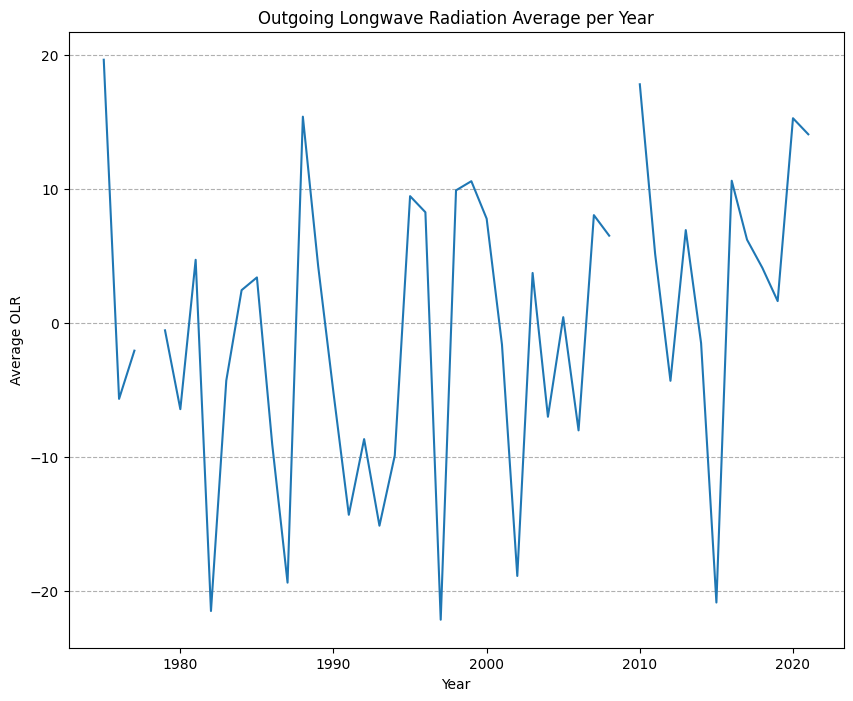

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(olr['year'], olr['olr_avg'])
plt.title('Outgoing Longwave Radiation Average per Year')
plt.xlabel('Year')
plt.ylabel('Average OLR')
plt.grid(axis='y', linestyle='--')

In [ ]:
combo.head()

,year,soi_average,count,Annual anomaly,nino_anomaly,prev_count
0,1975,2.766667,8,-0.438,-1.280000,NaN
1,1976,-0.383333,7,-0.366,0.496667,8.0
2,1977,-1.633333,6,-0.078,0.540000,7.0
3,1978,0.366667,11,-0.186,-0.325000,6.0
4,1979,0.383333,8,0.048,0.245000,11.0


In [ ]:
# merge with combo
combo = pd.merge(olr[['year', 'olr_avg']], combo, on='year', how='inner')

In [ ]:
# check for succsesful merge
combo.head()

,year,olr_avg,soi_average,count,Annual anomaly,nino_anomaly,prev_count
0,1975,19.633333,2.766667,8,-0.438,-1.280000,NaN
1,1976,-5.683333,-0.383333,7,-0.366,0.496667,8.0
2,1977,-2.083333,-1.633333,6,-0.078,0.540000,7.0
3,1978,NaN,0.366667,11,-0.186,-0.325000,6.0
4,1979,-0.566667,0.383333,8,0.048,0.245000,11.0


In [ ]:
# read in north atlantic oscillation data
nao_data = """year  Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec
1950   0.92   0.40  -0.36   0.73  -0.59  -0.06  -1.26  -0.05   0.25   0.85  -1.26  -1.02
1951   0.08   0.70  -1.02  -0.22  -0.59  -1.64   1.37  -0.22  -1.36   1.87  -0.39   1.32
1952   0.93  -0.83  -1.49   1.01  -1.12  -0.40  -0.09  -0.28  -0.54  -0.73  -1.13  -0.43
1953   0.33  -0.49  -0.04  -1.67  -0.66   1.09   0.40  -0.71  -0.35   1.32   1.04  -0.47
1954   0.37   0.74  -0.83   1.34  -0.09  -0.25  -0.60  -1.90  -0.44   0.60   0.40   0.69
1955  -1.84  -1.12  -0.53  -0.42  -0.34  -1.10   1.76   1.07   0.32  -1.47  -1.29   0.17
1956  -0.22  -1.12  -0.05  -1.06   2.21   0.10  -0.75  -1.37   0.24   0.88   0.51   0.10
1957   1.05   0.11  -1.26   0.49  -0.79  -0.72  -1.19  -0.55  -1.66   1.32   0.73   0.12
1958  -0.54  -1.06  -1.96   0.37  -0.24  -1.38  -1.73  -1.56  -0.07   0.16   1.64  -0.70
1959  -0.87   0.68  -0.15   0.36   0.39   0.40   0.74   0.06   0.88   0.89   0.41   0.44
1960  -1.29  -1.89  -0.50   1.36   0.45  -0.21   0.35  -1.40   0.39  -1.73  -0.51   0.06
1961   0.41   0.45   0.55  -1.55  -0.36   0.86  -0.39   0.90   1.24   0.51  -0.62  -1.48
1962   0.61   0.55  -2.47   0.99  -0.10   0.16  -2.47   0.14  -0.37   0.41  -0.23  -1.32
1963  -2.12  -0.96  -0.43  -1.35   2.16  -0.43  -0.77  -0.64   1.79   0.94  -1.27  -1.92
1964  -0.95  -1.43  -1.20   0.36   0.52   1.29   1.90  -1.77   0.20   0.74  -0.01  -0.15
1965  -0.12  -1.55  -1.51   0.72  -0.62   0.29   0.32   0.45   0.37   0.38  -1.66   1.37
1966  -1.74  -1.39   0.56  -0.75   0.22   1.05   0.32  -1.76  -0.45  -0.68  -0.04   0.72
1967  -0.89   0.19   1.51   0.18  -0.99   1.40   0.41   1.44   0.93   0.07   0.60  -0.45
1968   0.13  -1.29   0.40  -1.08  -1.76   0.33  -0.80  -0.66  -1.92  -2.30  -0.93  -1.40
1969  -0.83  -1.55  -1.56   1.53   0.55   0.55   0.57  -1.45   2.07   0.66  -0.96  -0.28
1970  -1.50   0.64  -0.96  -1.30   1.14   1.55   0.10   0.10  -0.09  -0.92  -0.60  -1.20
1971  -1.13   0.24  -0.84  -0.24   0.50  -1.57   0.24   1.55   0.39   0.58  -0.20   0.60
1972   0.27   0.32   0.72  -0.22   0.95   0.88   0.18   1.32  -0.12   1.09   0.54   0.19
1973   0.04   0.85   0.30  -0.54  -0.44   0.39   0.57  -0.06  -0.30  -1.24  -0.93   0.32
1974   1.34  -0.14  -0.03   0.51  -0.24  -0.14  -0.76  -0.64   0.82   0.49  -0.54   1.50
1975   0.58  -0.62  -0.61  -1.60  -0.52  -0.84   1.55  -0.26   1.56  -0.54   0.41   0.00
1976  -0.25   0.93   0.75   0.26   0.96   0.80  -0.32   1.92  -1.29  -0.08   0.17  -1.60
1977  -1.04  -0.49  -0.81   0.65  -0.86  -0.57  -0.45  -0.28   0.37   0.52  -0.07  -1.00
1978   0.66  -2.20   0.70  -1.17   1.08   1.38  -1.14   0.64   0.46   1.93   3.04  -1.57
1979  -1.38  -0.67   0.78  -1.71  -1.03   1.60   0.83   0.96   1.01  -0.30   0.53   1.00
1980  -0.75   0.05  -0.31   1.29  -1.50  -0.37  -0.42  -2.24   0.66  -1.77  -0.37   0.78
1981   0.37   0.92  -1.19   0.36   0.20  -0.45   0.05   0.39  -1.45  -1.35  -0.38  -0.02
1982  -0.89   1.15   1.15   0.10  -0.53  -1.63   1.15   0.26   1.76  -0.74   1.60   1.78
1983   1.59  -0.53   0.95  -0.85  -0.07   0.99   1.19   1.61  -1.12   0.65  -0.98   0.29
1984   1.66   0.72  -0.37  -0.28   0.54  -0.42  -0.07   1.15   0.17  -0.07  -0.06   0.00
1985  -1.61  -0.49   0.20   0.32  -0.49  -0.80   1.22  -0.48  -0.52   0.90  -0.67   0.22
1986   1.11  -1.00   1.71  -0.59   0.85   1.22   0.12  -1.09  -1.12   1.55   2.29   0.99
1987  -1.15  -0.73   0.14   2.00   0.98  -1.82   0.52  -0.83  -1.22   0.14   0.18   0.32
1988   1.02   0.76  -0.17  -1.17   0.63   0.88  -0.35   0.04  -0.99  -1.08  -0.34   0.61
1989   1.17   2.00   1.85   0.28   1.38  -0.27   0.97   0.01   2.05  -0.03   0.16  -1.15
1990   1.04   1.41   1.46   2.00  -1.53  -0.02   0.53   0.97   1.06   0.23  -0.24   0.22
1991   0.86   1.04  -0.20   0.29   0.08  -0.82  -0.49   1.23   0.48  -0.19   0.48   0.46
1992  -0.13   1.07   0.87   1.86   2.63   0.20   0.16   0.85  -0.44  -1.76   1.19   0.47
1993   1.60   0.50   0.67   0.97  -0.78  -0.59  -3.18   0.12  -0.57  -0.71   2.56   1.56
1994   1.04   0.46   1.26   1.14  -0.57   1.52   1.31   0.38  -1.32  -0.97   0.64   2.02
1995   0.93   1.14   1.25  -0.85  -1.49   0.13  -0.22   0.69   0.31   0.19  -1.38  -1.67
1996  -0.12  -0.07  -0.24  -0.17  -1.06   0.56   0.67   1.02  -0.86  -0.33  -0.56  -1.41
1997  -0.49   1.70   1.46  -1.02  -0.28  -1.47   0.34   0.83   0.61  -1.70  -0.90  -0.96
1998   0.39  -0.11   0.87  -0.68  -1.32  -2.72  -0.48  -0.02  -2.00  -0.29  -0.28   0.87
1999   0.77   0.29   0.23  -0.95   0.92   1.12  -0.90   0.39   0.36   0.20   0.65   1.61
2000   0.60   1.70   0.77  -0.03   1.58  -0.03  -1.03  -0.29  -0.21   0.92  -0.92  -0.58
2001   0.25   0.45  -1.26   0.00  -0.02  -0.20  -0.25  -0.07  -0.65  -0.24   0.63  -0.83
2002   0.44   1.10   0.69   1.18  -0.22   0.38   0.62   0.38  -0.70  -2.28  -0.18  -0.94
2003   0.16   0.62   0.32  -0.18   0.01  -0.07   0.13  -0.07   0.01  -1.26   0.86   0.64
2004  -0.29  -0.14   1.02   1.15   0.19  -0.89   1.13  -0.48   0.38  -1.10   0.73   1.21
2005   1.52  -0.06  -1.83  -0.30  -1.25  -0.05  -0.51   0.37   0.63  -0.98  -0.31  -0.44
2006   1.27  -0.51  -1.28   1.24  -1.14   0.84   0.90  -1.73  -1.62  -2.24   0.44   1.34
2007   0.22  -0.47   1.44   0.17   0.66  -1.31  -0.58  -0.14   0.72   0.45   0.58   0.34
2008   0.89   0.73   0.08  -1.07  -1.73  -1.39  -1.27  -1.16   1.02  -0.04  -0.32  -0.28
2009  -0.01   0.06   0.57  -0.20   1.68  -1.21  -2.15  -0.19   1.51  -1.03  -0.02  -1.93
2010  -1.11  -1.98  -0.88  -0.72  -1.49  -0.82  -0.42  -1.22  -0.79  -0.93  -1.62  -1.85
2011  -0.88   0.70   0.61   2.48  -0.06  -1.28  -1.51  -1.35   0.54   0.39   1.36   2.52
2012   1.17   0.42   1.27   0.47  -0.91  -2.53  -1.32  -0.98  -0.59  -2.06  -0.58   0.17
2013   0.35  -0.45  -1.61   0.69   0.57   0.52   0.67   0.97   0.24  -1.28   0.90   0.95
2014   0.29   1.34   0.80   0.31  -0.92  -0.97   0.18  -1.68   1.62  -1.27   0.68   1.86
2015   1.79   1.32   1.45   0.73   0.15  -0.07  -3.18  -0.76  -0.65   0.44   1.74   2.24
2016   0.12   1.58   0.73   0.38  -0.77  -0.43  -1.76  -1.65   0.61   0.41  -0.16   0.48
2017   0.48   1.00   0.74   1.73  -1.91   0.05   1.26  -1.10  -0.61   0.19  -0.00   0.88
2018   1.44   1.58  -0.93   1.24   2.12   1.09   1.39   1.97   1.67   0.93  -0.11   0.61
2019   0.59   0.29   1.23   0.47  -2.62  -1.09  -1.43  -1.17  -0.16  -1.41   0.28   1.20
2020   1.34   1.26   1.01  -1.02  -0.41  -0.15  -1.23   0.12   0.98  -0.65   2.54  -0.30
2021  -1.11   0.14   0.73  -1.43  -1.24   0.77   0.03  -0.28  -0.21  -2.29  -0.18   0.29
2022   1.08   1.68   0.77  -0.36   0.71  -0.12  -0.09   1.47  -1.61  -0.72   0.69  -0.15
2023   1.25   0.92  -1.11  -0.63   0.39  -0.58  -2.17  -1.16  -0.44  -2.03"""

In [ ]:
# create dataframe
nao = pd.read_csv(StringIO(nao_data), delim_whitespace=True)

In [ ]:
nao.head()

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1950,0.92,0.40,-0.36,0.73,-0.59,-0.06,-1.26,-0.05,0.25,0.85,-1.26,-1.02
1,1951,0.08,0.70,-1.02,-0.22,-0.59,-1.64,1.37,-0.22,-1.36,1.87,-0.39,1.32
2,1952,0.93,-0.83,-1.49,1.01,-1.12,-0.40,-0.09,-0.28,-0.54,-0.73,-1.13,-0.43
3,1953,0.33,-0.49,-0.04,-1.67,-0.66,1.09,0.40,-0.71,-0.35,1.32,1.04,-0.47
4,1954,0.37,0.74,-0.83,1.34,-0.09,-0.25,-0.60,-1.90,-0.44,0.60,0.40,0.69


In [ ]:
# get years from original dataset (1975-2021)
nao = nao[(nao['year'] >= 1975) & (nao['year'] < 2022)]

In [ ]:
# drop non-hurricane season months
nao.drop(nao.columns[[1,2,3,4,5,12]], axis=1, inplace=True)

In [ ]:
# get average nao
nao['nao_avg'] = nao.iloc[:, 1:].mean(axis=1)

In [ ]:
nao.head()

,year,Jun,Jul,Aug,Sep,Oct,Nov,nao_avg
25,1975,-0.84,1.55,-0.26,1.56,-0.54,0.41,0.313333
26,1976,0.80,-0.32,1.92,-1.29,-0.08,0.17,0.200000
27,1977,-0.57,-0.45,-0.28,0.37,0.52,-0.07,-0.080000
28,1978,1.38,-1.14,0.64,0.46,1.93,3.04,1.051667
29,1979,1.60,0.83,0.96,1.01,-0.30,0.53,0.771667


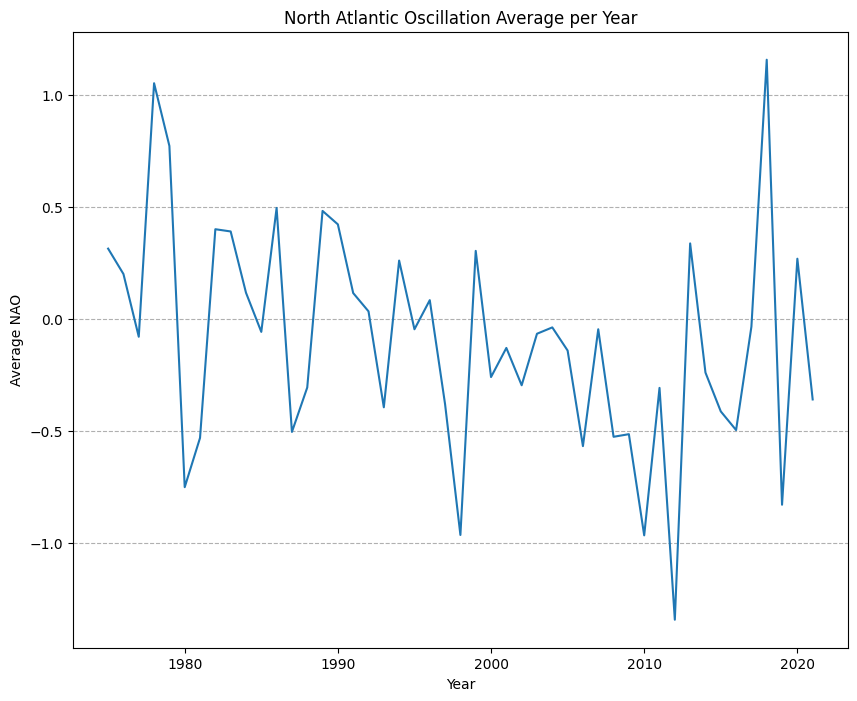

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(nao['year'], nao['nao_avg'])
plt.title('North Atlantic Oscillation Average per Year')
plt.xlabel('Year')
plt.ylabel('Average NAO')
plt.grid(axis='y', linestyle='--')

In [ ]:
# merge with combo
combo = pd.merge(nao[['year', 'nao_avg']], combo, on='year', how='inner')

In [ ]:
combo.head()

,year,nao_avg,olr_avg,soi_average,count,Annual anomaly,nino_anomaly,prev_count
0,1975,0.313333,19.633333,2.766667,8,-0.438,-1.280000,NaN
1,1976,0.200000,-5.683333,-0.383333,7,-0.366,0.496667,8.0
2,1977,-0.080000,-2.083333,-1.633333,6,-0.078,0.540000,7.0
3,1978,1.051667,NaN,0.366667,11,-0.186,-0.325000,6.0
4,1979,0.771667,-0.566667,0.383333,8,0.048,0.245000,11.0


c:\Users\15127\anaconda3\envs\cs329e\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


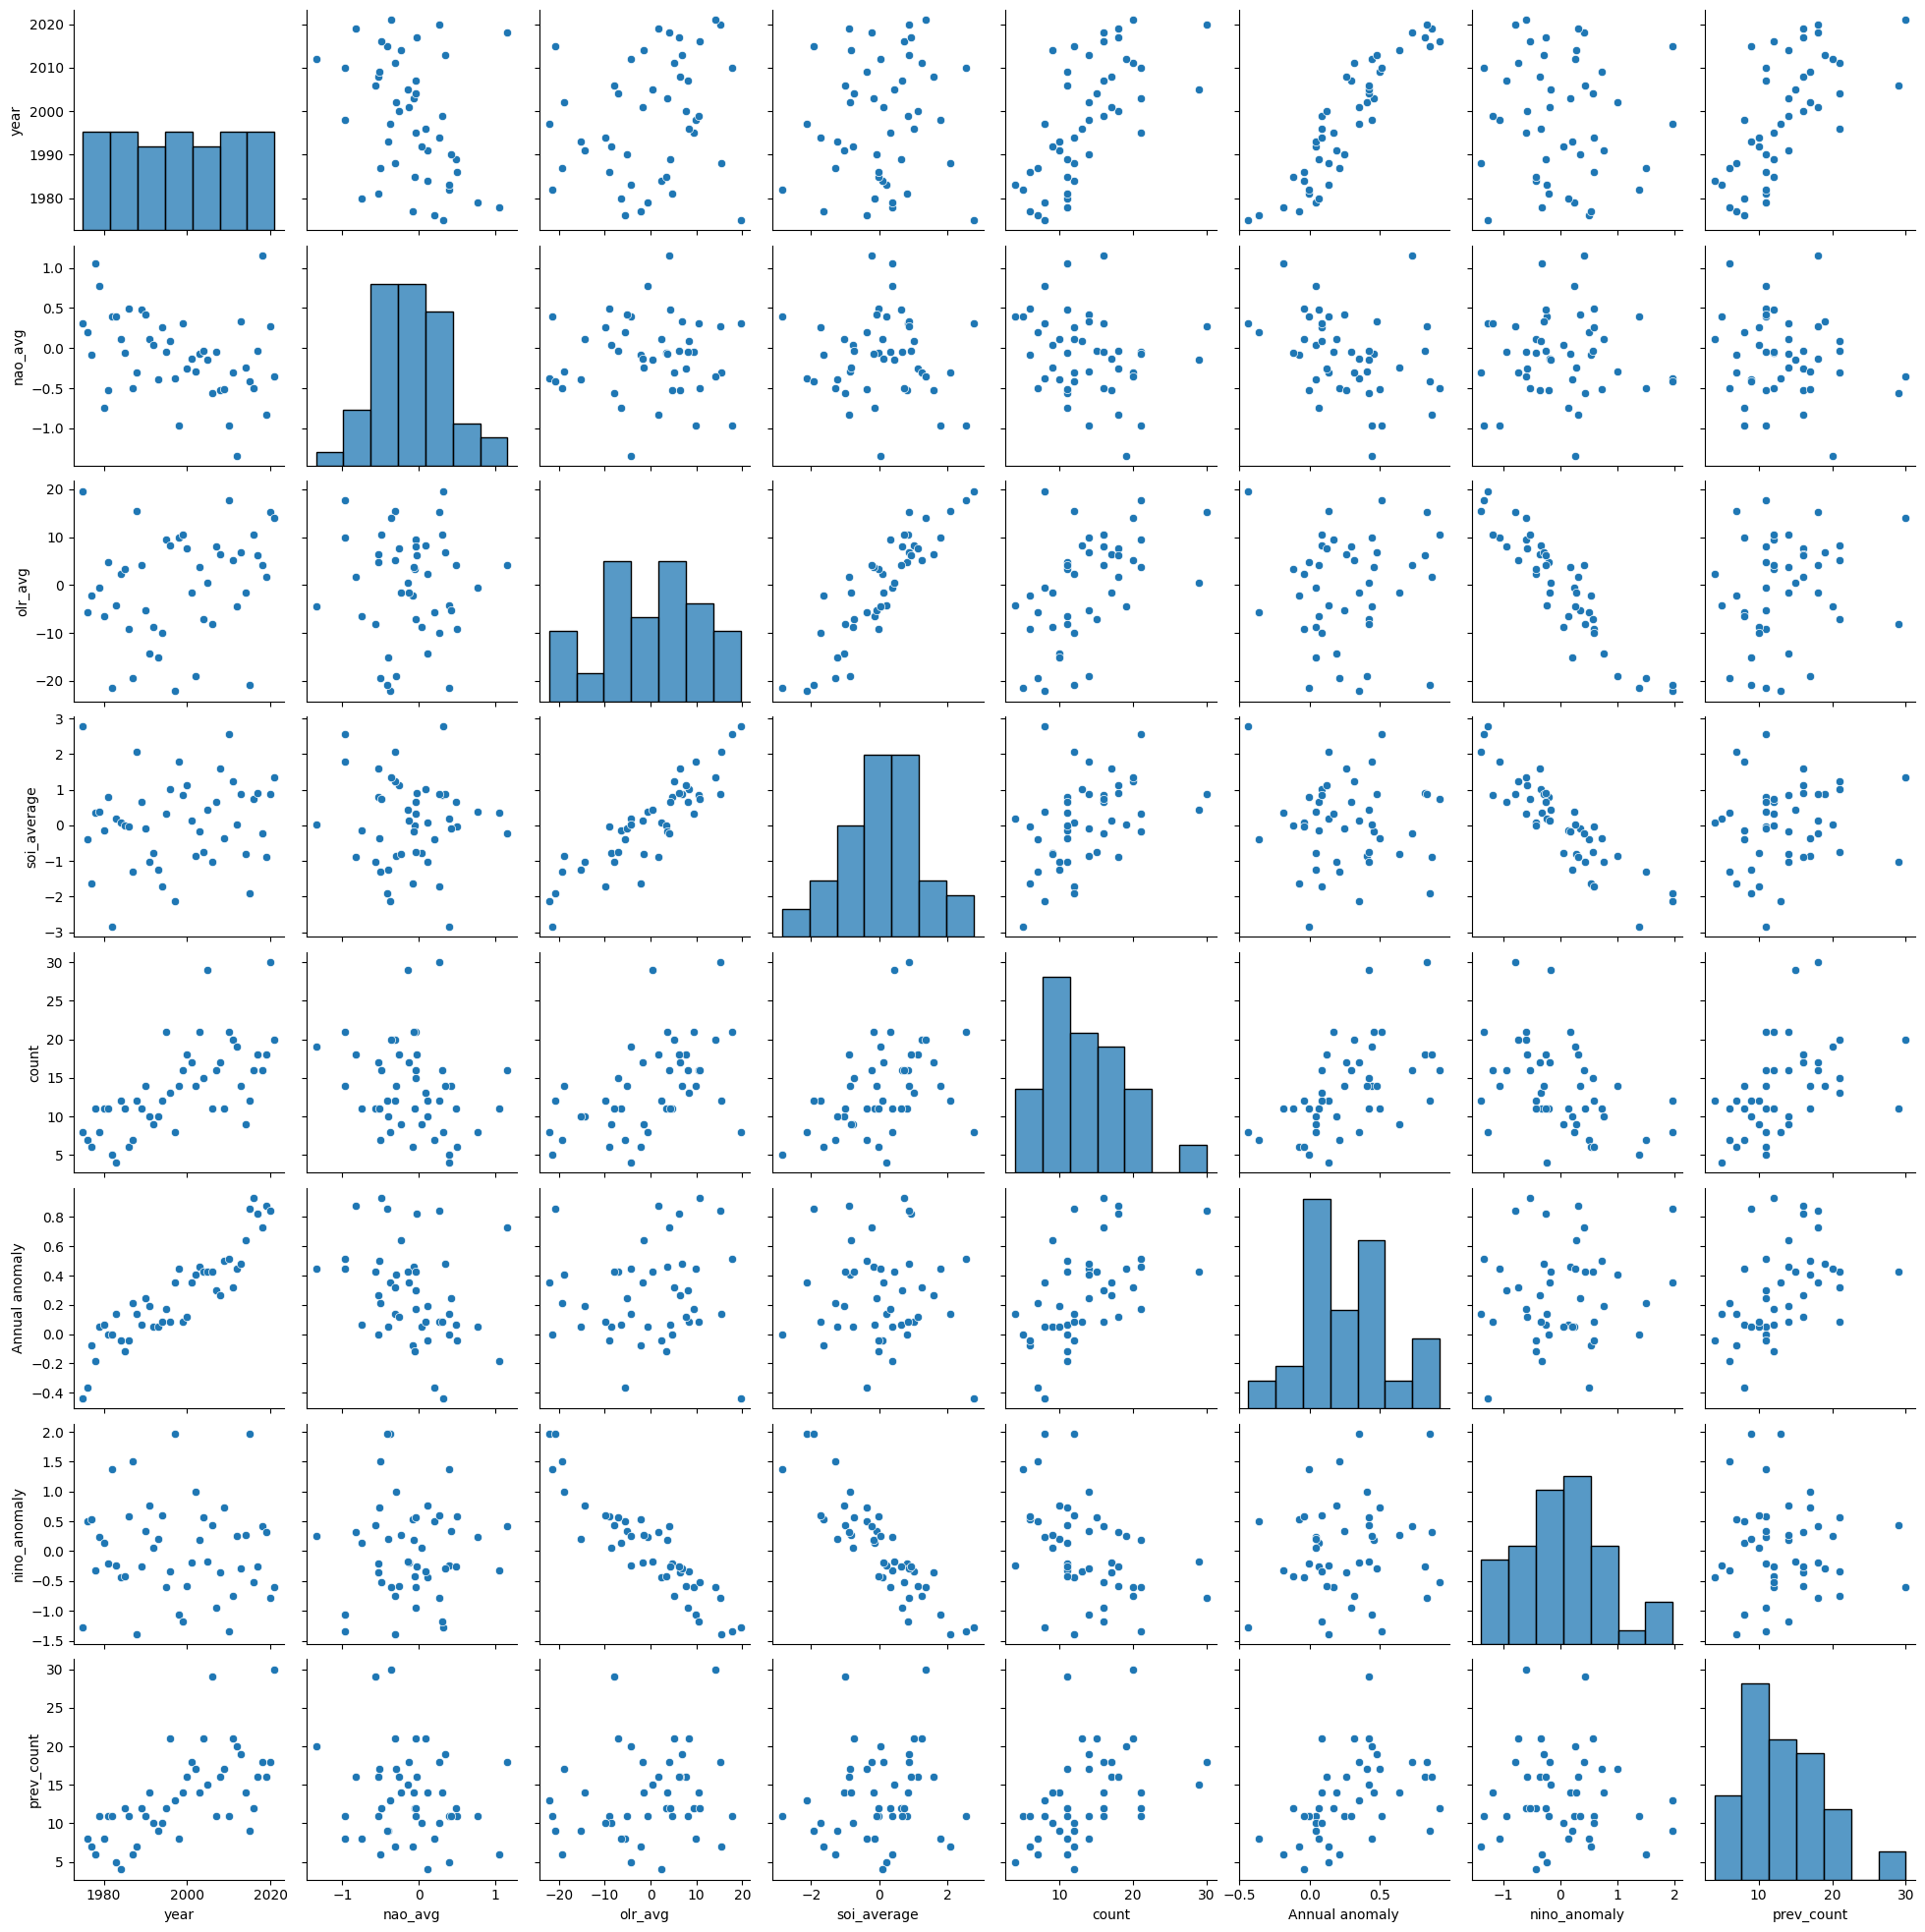

In [ ]:
import seaborn as sns

sns.pairplot(combo, diag_kind='hist')

In [ ]:
# IMPORT MODULES
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

# Define a Standard Scaler to normalize inputs
scaler = preprocessing.StandardScaler()

# Define model
ridge = Ridge()

# Define poly order
poly= PolynomialFeatures()

# Combine them
model = make_pipeline(poly, scaler, ridge)

In [ ]:
model2 = make_pipeline(PolynomialFeatures(), scaler, LinearRegression())

In [ ]:
# find and drop any rows with nan. is there a better way to handle nan values? talk about w/ group or professor
combo.isna().sum()

year              0
nao_avg           0
olr_avg           2
soi_average       0
count             0
Annual anomaly    1
nino_anomaly      0
prev_count        1
dtype: int64

In [ ]:
# add number of TS in 1974
combo.at[0, 'prev_count'] = 7

In [ ]:
combo.tail()

,year,nao_avg,olr_avg,soi_average,count,Annual anomaly,nino_anomaly,prev_count
42,2017,-0.035000,6.200000,0.916667,18,0.822,-0.255000,16.0
43,2018,1.156667,4.100000,-0.216667,16,0.732,0.421667,18.0
44,2019,-0.830000,1.616667,-0.900000,18,0.876,0.313333,16.0
45,2020,0.268333,15.266667,0.883333,30,0.840,-0.788333,18.0
46,2021,-0.360000,14.066667,1.350000,20,NaN,-0.605000,30.0


In [ ]:
# add annual anomaly as per https://www.ncei.noaa.gov/access/monitoring/monthly-report/global/202013#ohc
combo.at[len(combo) - 1, 'Annual anomaly'] = 0.810

In [ ]:
combo.isna().sum()

year              0
nao_avg           0
olr_avg           2
soi_average       0
count             0
Annual anomaly    0
nino_anomaly      0
prev_count        0
dtype: int64

In [ ]:
#### DROP ROWS WITH NA?
combo_clean = combo.dropna()

In [ ]:
# CODE FOR EVENTUAL REGRESSION ONCE WE HAVE ALL FEATURES
y = combo_clean['count']
X = combo_clean.drop('count', axis=1)

from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=1, train_size=0.7)

In [ ]:
# import gridsearch
from sklearn.model_selection import GridSearchCV

# define ranges of alpha to check
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# define ranges of powers of polynomial to check
powers= range(1,6)
# DEFINE PARAMETER GRIDS
param_grid = {'ridge__alpha' :alpha, 
              'polynomialfeatures__degree': list(powers)}

# do grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', 
                    cv=5, verbose=1, n_jobs=-1)

# train model
grid_result = grid.fit(X_train_val, y_train_val)

# Print the best score and best hyperparameter values.
print(f'Best Score:', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


Best Score: -17.428956123682198
Best Params:  {'polynomialfeatures__degree': 1, 'ridge__alpha': 10}


In [ ]:
# import gridsearch
from sklearn.model_selection import GridSearchCV

# define ranges of alpha to check
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# define ranges of powers of polynomial to check
powers= range(1,6)
# DEFINE PARAMETER GRIDS
param_grid = {'polynomialfeatures__degree': list(powers)}

# do grid search
grid2 = GridSearchCV(estimator=model2, param_grid=param_grid, scoring='neg_mean_squared_error', 
                    cv=5, verbose=1, n_jobs=-1)

# train model
grid_result2 = grid2.fit(X_train_val, y_train_val)

# Print the best score and best hyperparameter values.
print(f'Best Score:', grid_result2.best_score_)
print('Best Params: ', grid_result2.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Score: -20.23359573832117
Best Params:  {'polynomialfeatures__degree': 1}


In [ ]:
# Define best_model with the best hyperparameter values.
best_model = grid_result.best_estimator_
best_model2 = grid_result2.best_estimator_

In [ ]:
import matplotlib.pyplot as plt

# IMPORT MODULES
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# predict # of hurricanes   
y_predict = best_model.predict(X_test)

# Print RMSE and r2 values. Print the values to 2 decimal places.
rmse=mean_squared_error(y_test, y_predict, squared = False)
r2 = r2_score(y_test, y_predict)
print(f'RMSE= {rmse:.2f}')
print(f'r2= { r2:.2f}')

RMSE= 3.33
r2= 0.58


Text(0.5, 0, 'Actual # of Hurricanes')

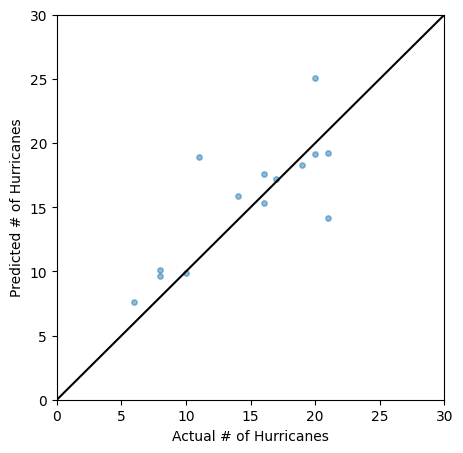

In [ ]:
# Create a scatterplot comparing predicted and actual temperatures.
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_predict,s=15, alpha=0.5)
plt.xlim(0,30)
plt.ylim(0,30)
plt.plot([0,30], [0,30], c='k')
plt.ylabel('Predicted # of Hurricanes')
plt.xlabel('Actual # of Hurricanes')